# Replacing the Flower Screen with a Plain Yellow Screen

This notebook outlines the improved process of replacing the flower screen with a plain yellow screen in images collected from DIOPSIS insect cameras.

The objective is to prepare the images for further analysis by algorithms that expect a yellow background. We will use OpenCV for image processing tasks, to detect the non-yellow parts of the image (flowers and insects) and replace the rest with yellow.

First, we will load the image, convert it to the HSV color space for better color segmentation, and then isolate the flower pattern. The isolated areas will then be replaced with the yellow color.

In [2]:
# Cell 1: Importing Required Libraries
# ------------------------------------

import cv2
import numpy as np
from matplotlib import pyplot as plt

def display_image(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

## Load the Image

We need to load the images that we want to process. OpenCV reads images in BGR format, which we can then convert to HSV for better color detection.

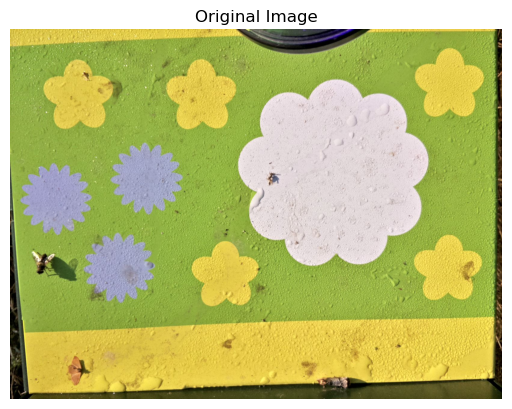

In [26]:
# Cell 2: Loading the Image
# ------------------------

image_path = './data/flower-day-1.jpeg'
image = cv2.imread(image_path)

# Display the original image
display_image(image, 'Original Image')

## Convert Image to HSV Color Space

We convert the image to HSV color space to make it easier to filter by color.

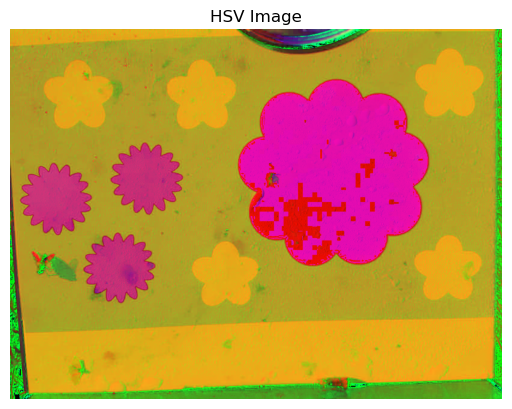

In [22]:
# Cell 3: Convert Image to HSV
# ---------------------------

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
display_image(hsv, 'HSV Image')

## Define Color Range and Create Mask

Now, we'll define the color range for non-yellow parts (flowers and insects) and create a mask. The exact color range will need to be determined by inspecting the HSV values of the flowers in the image. We can start with a general range and refine it based on the results.

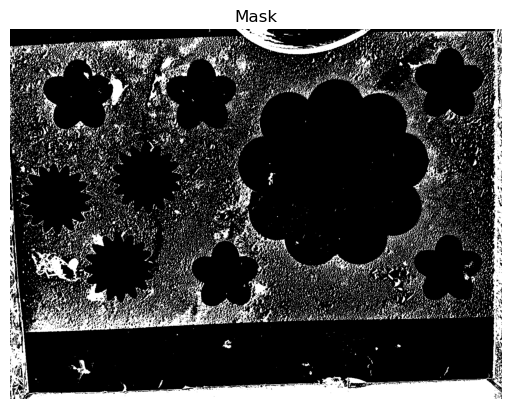

In [55]:
# Cell 4: Defining Color Range and Creating Mask
# ----------------------------------------------

# Define the lower and upper bounds of the "non-yellow" colors
# These values need to be fine-tuned from the results of the HSV notebooks to get the best results
lower_hue = 0
lower_saturation = 0
lower_value = 0
upper_hue = 46
upper_saturation = 235
upper_value = 169

lower_bound = np.array([lower_hue, lower_saturation, lower_value])
upper_bound = np.array([upper_hue, upper_saturation, upper_value])
mask = cv2.inRange(hsv, lower_bound, upper_bound)
display_image(mask, 'Mask')

## Invert Mask and Create Yellow Background

We need to invert the mask to get the yellow part and prepare a yellow background that matches the image size.

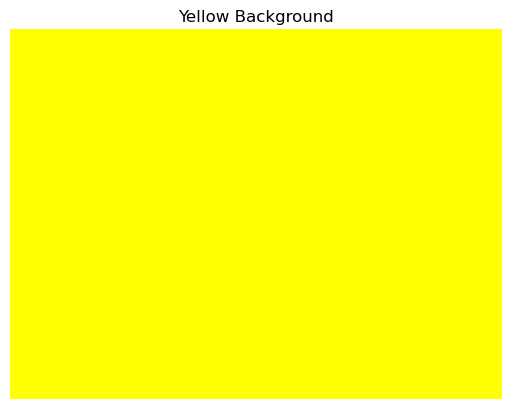

In [56]:
# Cell 5: Inverting Mask and Creating Yellow Background
# -----------------------------------------------------

# Invert the mask to get the background
background_mask = cv2.bitwise_not(mask)

# Prepare a yellow background
yellow_background = np.full(image.shape, (0, 255, 255), dtype=np.uint8)

# Display the yellow background
display_image(yellow_background, 'Yellow Background')

## Replace Background with Yellow

With the mask and the yellow background ready, we can now replace the original image's background with yellow.

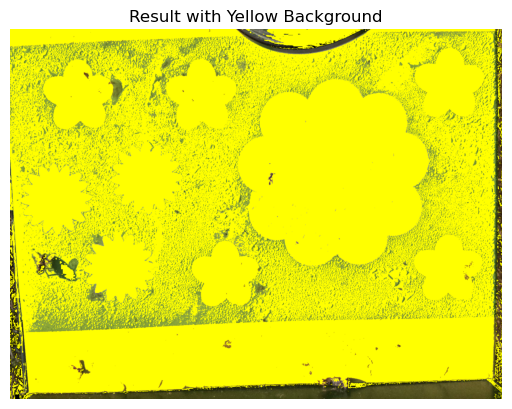

True

In [57]:
# Cell 6: Replacing Background with Yellow
# ----------------------------------------

# Use the background mask to blend the yellow background with the original image
result = cv2.bitwise_and(yellow_background, yellow_background, mask=background_mask)
result = cv2.add(result, cv2.bitwise_and(image, image, mask=mask))

# Display the final result
display_image(result, 'Result with Yellow Background')

# Save the result
output_path = './data/image_with_yellow_background.jpg'
cv2.imwrite(output_path, result)